Dataset:
      Year    SPAIN  U ARAB EMTS       U K    U S A
0  2003-04  2688.73      1423.33  12776.51  5394.85
1  2004-05  3294.90      2275.85  14165.83  5980.17
2  2005-06  4951.06      2495.47  14534.48  8599.78
3  2006-07  4828.95      2630.43  19204.74  7671.69
4  2007-08  4889.94      2591.36  14946.34  7988.82 

Updated dataset:
    Year    SPAIN  U ARAB EMTS       U K     U S A
0   2003  2688.73      1423.33  12776.51   5394.85
1   2004  3294.90      2275.85  14165.83   5980.17
2   2005  4951.06      2495.47  14534.48   8599.78
3   2006  4828.95      2630.43  19204.74   7671.69
4   2007  4889.94      2591.36  14946.34   7988.82
5   2008  5807.81      2964.26  17108.39   8717.81
6   2009  6240.46      3011.15  21534.92   6333.47
7   2010  7217.63      2242.97  23343.16   7049.63
8   2011  6069.92      3403.00  20466.98   8275.08
9   2012  5839.75      3194.85  22366.03  10897.56
10  2013  6885.42      3455.52  22905.86  16120.90
11  2014  5685.80      2662.72  22553.94  15002.

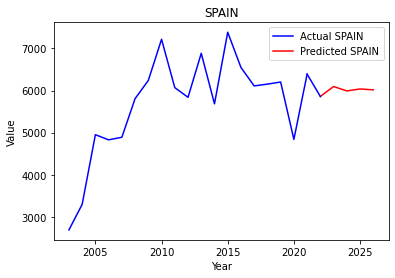

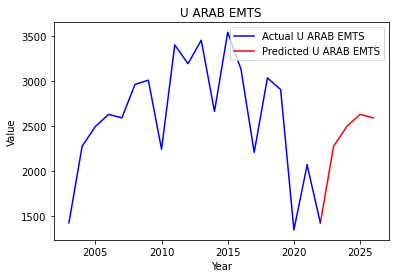

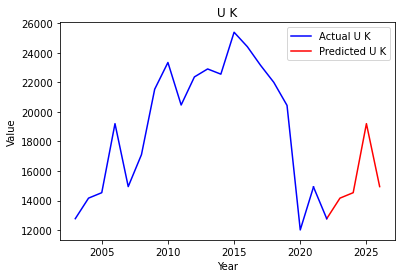

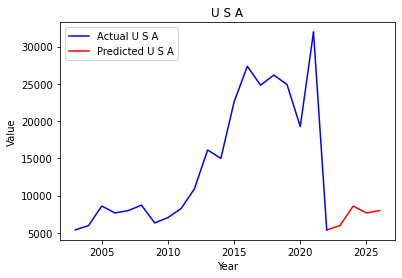

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tabulate import tabulate
from termcolor import colored

#importing dataset
df = pd.read_csv(r'C:\Users\mypc\Downloads\Data3.csv')
cols = df.columns
columns = df.columns[1:]
print("Dataset:")
print(df.head(),"\n")

#extracting and setting  the year
df['Year'] = df['Year'].str[:4].astype(np.int64)
print("Updated dataset:")
print(df,"\n")

#extracting values
x = df['Year'].values.reshape(-1, 1)
y = df['SPAIN'].values
y1 = df['U ARAB EMTS'].values
y2 = df['U K'].values
y3 = df['U S A'].values


#Fit the ARIMA model
arima_model = ARIMA(y, order=(1, 1, 1))
arima_model_fit = arima_model.fit()


#To Predict for the next 5 years
future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6).reshape(-1, 1)
future_predictions = arima_model_fit.predict(start=len(y), end=len(y) + 4)
df0=pd.Series(future_predictions)

#Create a DataFrame for the future predictions
df_future = pd.DataFrame({'Year': future_years.flatten(), 'SPAIN': df0})


#y1
arima_model = ARIMA(y1, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6).reshape(-1, 1)
future_predictions = arima_model_fit.predict(start=len(y1), end=len(y1) + 4)

df1=pd.Series(future_predictions)

df_future['U ARAB EMTS']=pd.concat([df['U ARAB EMTS'],df1],ignore_index=True)


#y2
arima_model = ARIMA(y2, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6).reshape(-1, 1)
future_predictions = arima_model_fit.predict(start=len(y2), end=len(y2) + 4)

df2=pd.Series(future_predictions)

df_future['U K']=pd.concat([df['U K'],df2],ignore_index=True)


#y3
arima_model = ARIMA(y3, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6).reshape(-1, 1)
future_predictions = arima_model_fit.predict(start=len(y3), end=len(y3) + 4)

df3=pd.Series(future_predictions)

df_future['U S A']=pd.concat([df['U S A'],df3],ignore_index=True)


#Appending the future predictions to the existing dataset
df_extended = pd.concat([df, df_future], ignore_index=True)

#Displaying the extended dataset
colored_output = tabulate(df_extended, headers=cols, tablefmt='grid')
colored_output = colored(colored_output, 'blue', 'on_grey')
print("Final dataset:")
print(colored_output)

#Plot the actual and predicted values as continuous lines with a connecting line
for column in columns:
    plt.plot(df['Year'], df[column], label='Actual ' + column, linestyle='-',color='blue')
    plt.plot(df_future['Year'], df_future[column], label='Predicted ' + column, linestyle='-',color='red')
    plt.plot([df['Year'].iloc[-1], df_future['Year'].iloc[0]], [df[column].iloc[-1], df_future[column].iloc[0]], linestyle='-', color='blue')
    plt.title(column)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()